In [3]:
import pandas as pd
import numpy as np
import os

# Définition du chemin vers les données 
path = r"C:\Users\amisf\Desktop\datascientest_projet"

# On affiche la liste des fichiers trouvés pour être sûr que tout est là
print("Fichiers dans le dossier :")
for fichier in os.listdir(path):
    print(fichier)

Fichiers dans le dossier :
.ipynb_checkpoints
01_Exploration_Rakuten(johan.frachon).ipynb
data_enginering_machine.pem
fiche résumé ensemble .docx
images.zip
X_test_update.csv
X_train_update.csv
Y_train_CVw08PX.csv


In [4]:
# Chargement des fichiers CSV en utilisant la variable 'path' définie juste avant
# index_col=0 permet d'utiliser la première colonne (l'identifiant) comme index
df_x = pd.read_csv(os.path.join(path, "X_train_update.csv"), index_col=0)
df_y = pd.read_csv(os.path.join(path, "Y_train_CVw08PX.csv"), index_col=0)

# Fusion des deux (X et Y) pour avoir les données et la cible dans le même tableau 'df'
df = pd.merge(df_x, df_y, left_index=True, right_index=True)

# Affichage des dimensions (lignes, colonnes) et des 5 premières lignes
print(f"Dimensions du dataset : {df.shape}")
display(df.head())

# Affichage des informations techniques (types de colonnes, valeurs manquantes)
print("\nInformations sur le DataFrame :")
df.info()

Dimensions du dataset : (84916, 5)


,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705



Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


Il y a 27 catégories différentes.

Les 5 catégories les plus fréquentes :
prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
Name: count, dtype: int64

Les 5 catégories les moins fréquentes :
prdtypecode
60      832
2220    824
1301    807
1940    803
1180    764
Name: count, dtype: int64


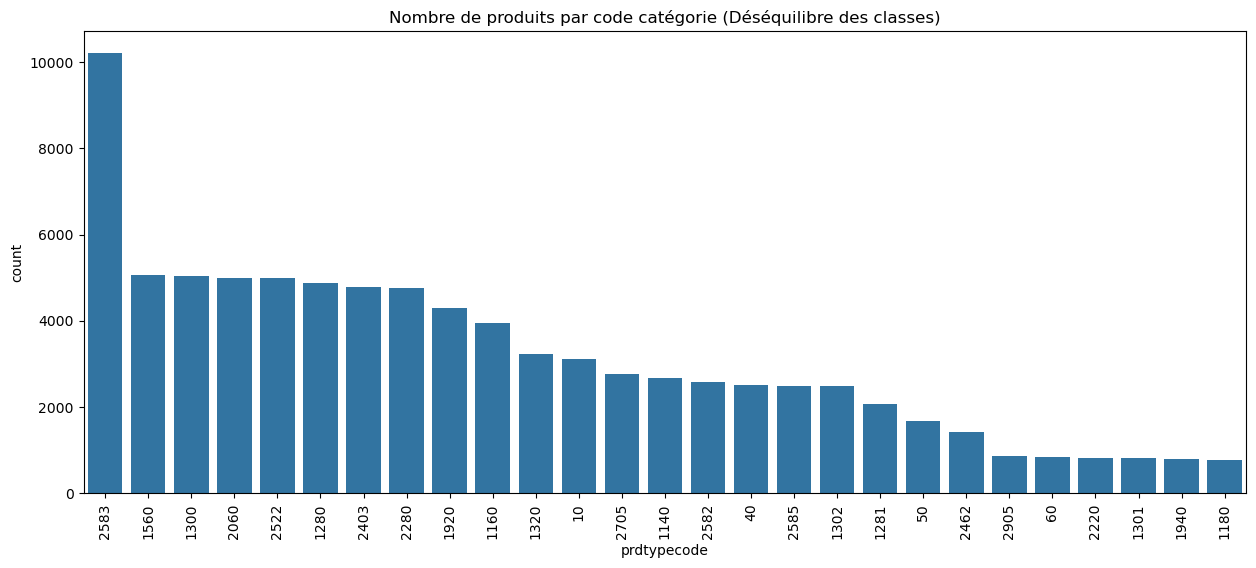

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# On compte le nombre d'articles pour chaque code catégorie
comptage = df['prdtypecode'].value_counts()

print(f"Il y a {len(comptage)} catégories différentes.")
print("\nLes 5 catégories les plus fréquentes :")
print(comptage.head())

print("\nLes 5 catégories les moins fréquentes :")
print(comptage.tail())

# Visualisation graphique pour voir le déséquilibre
plt.figure(figsize=(15, 6))
sns.countplot(x='prdtypecode', data=df, order=comptage.index)
plt.title("Nombre de produits par code catégorie (Déséquilibre des classes)")
plt.xticks(rotation=90) # On tourne les étiquettes pour qu'elles soient lisibles
plt.show()

Chemin des images configuré : C:\Users\amisf\Desktop\datascientest_projet\images\images\image_train

--- Exemple d'image aléatoire ---


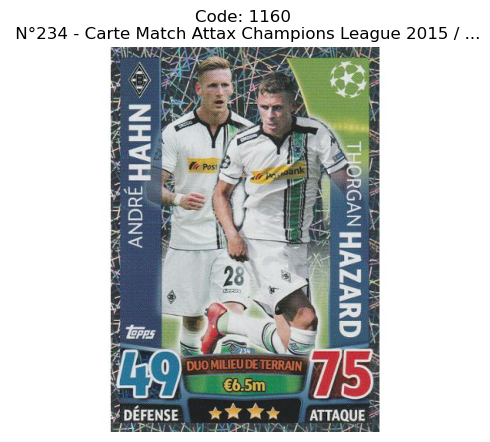

Taille de l'image : (500, 500)


In [9]:
from PIL import Image

# Définition du chemin spécifique vers le dossier d'entraînement des images
# Basé sur votre indication : dossier "images" imbriqué
path_img_train = os.path.join(path, "images", "images", "image_train")

print(f"Chemin des images configuré : {path_img_train}")

# Fonction pour afficher une image à partir d'une ligne du DataFrame
def visualiser_image(row):
    # Construction du nom de fichier selon le format Rakuten : image_IMAGEID_product_PRODUCTID.jpg
    nom_image = f"image_{row['imageid']}_product_{row['productid']}.jpg"
    chemin_complet = os.path.join(path_img_train, nom_image)
    
    try:
        img = Image.open(chemin_complet)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Code: {row['prdtypecode']} \n {row['designation'][:50]}...") # Titre avec code et début de désignation
        plt.show()
        print(f"Taille de l'image : {img.size}")
    except FileNotFoundError:
        print(f"ERREUR : L'image {nom_image} est introuvable dans {path_img_train}")

# Affichage d'un exemple aléatoire
print("\n--- Exemple d'image aléatoire ---")
exemple = df.sample(1).iloc[0] # Prend une ligne au hasard
visualiser_image(exemple)

Visualisation de 5 images de catégories différentes :


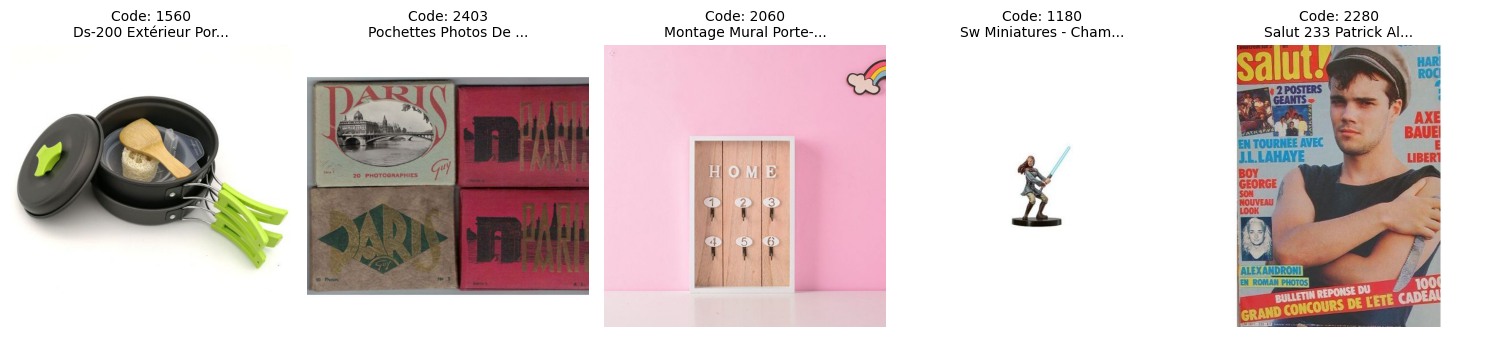

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Afficher plusieurs images aléatoires pour différentes catégories
def visualiser_images_par_categorie(df, nb_images=5):
    categories = df['prdtypecode'].unique()
    # Sélectionner quelques catégories aléatoires
    categories_selection = np.random.choice(categories, nb_images, replace=False)
    
    plt.figure(figsize=(15, 5))
    for i, code in enumerate(categories_selection):
        # Prendre un produit aléatoire de cette catégorie
        row = df[df['prdtypecode'] == code].sample(1).iloc[0]
        nom_image = f"image_{row['imageid']}_product_{row['productid']}.jpg"
        chemin_complet = os.path.join(path_img_train, nom_image)
        
        try:
            img = Image.open(chemin_complet)
            plt.subplot(1, nb_images, i+1)
            plt.imshow(img)
            plt.axis('off')
            # Titre court pour lisibilité
            titre = f"Code: {code}\n{row['designation'][:20]}..."
            plt.title(titre, fontsize=10)
        except FileNotFoundError:
            pass
            
    plt.tight_layout()
    plt.show()

print("Visualisation de 5 images de catégories différentes :")
visualiser_images_par_categorie(df)

--- Analyse des Valeurs Manquantes ---
description    35.093504
dtype: float64


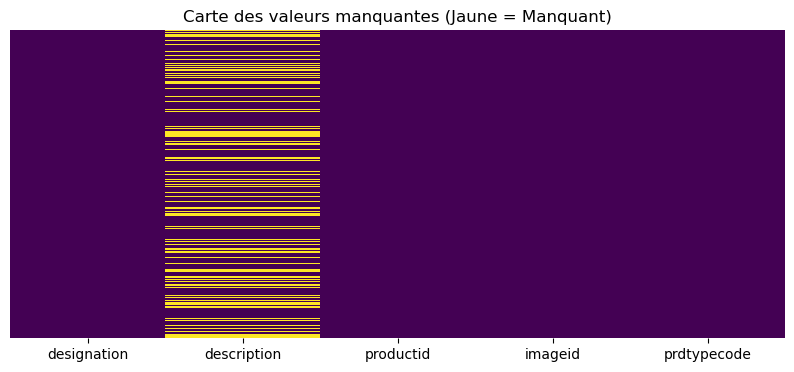


--- Statistiques des longueurs de texte ---
       designation_len  description_len
count     84916.000000     84916.000000
mean         70.163303       524.555926
std          36.793383       754.893905
min          11.000000         0.000000
25%          43.000000         0.000000
50%          64.000000       231.000000
75%          90.000000       823.000000
max         250.000000     12451.000000


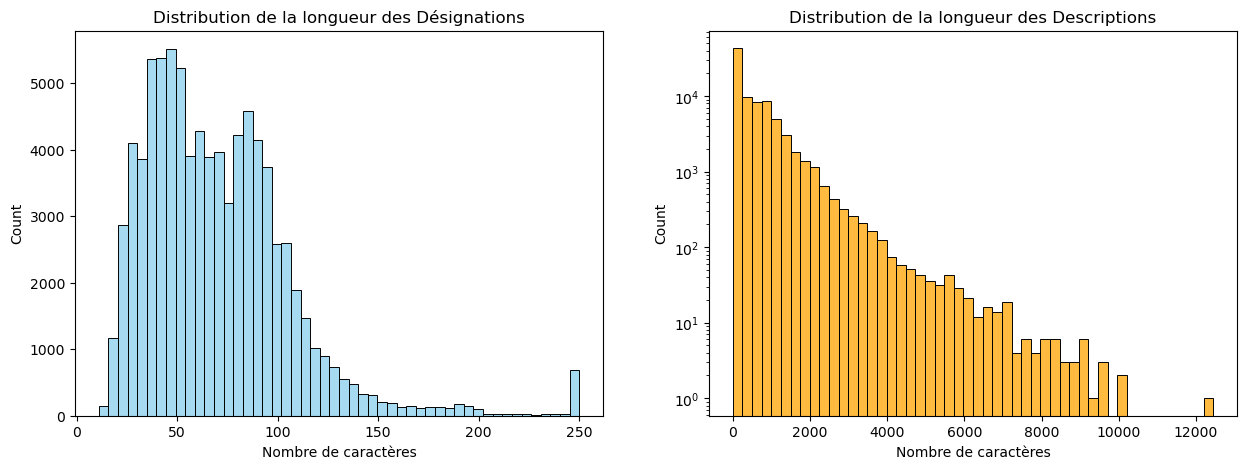

In [11]:

# 1. Calcul précis des données manquantes
print("--- Analyse des Valeurs Manquantes ---")
missing_rates = df.isnull().mean() * 100
print(missing_rates[missing_rates > 0])

# Visualisation des manquants
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Carte des valeurs manquantes (Jaune = Manquant)")
plt.show()

# 2. Création de variables de longueur de texte (Feature Engineering exploratoire)
# On remplit les NaN par une chaine vide pour pouvoir calculer la longueur
df['designation_len'] = df['designation'].astype(str).apply(len)
df['description_len'] = df['description'].fillna("").astype(str).apply(len)

# 3. Statistiques sur les longueurs de texte
print("\n--- Statistiques des longueurs de texte ---")
print(df[['designation_len', 'description_len']].describe())

# 4. Visualisation de la distribution des longueurs
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme Désignation
sns.histplot(df['designation_len'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title("Distribution de la longueur des Désignations")
ax[0].set_xlabel("Nombre de caractères")

# Histogramme Description (échelle log pour mieux voir car très variable)
sns.histplot(df['description_len'], bins=50, ax=ax[1], color='orange')
ax[1].set_title("Distribution de la longueur des Descriptions")
ax[1].set_xlabel("Nombre de caractères")
ax[1].set_yscale('log') 

plt.show()

--- Analyse statistique des Images (Echantillon 1000) ---
Dimensions moyennes : [500. 500.]
Dimensions min : [500 500]
Dimensions max : [500 500]


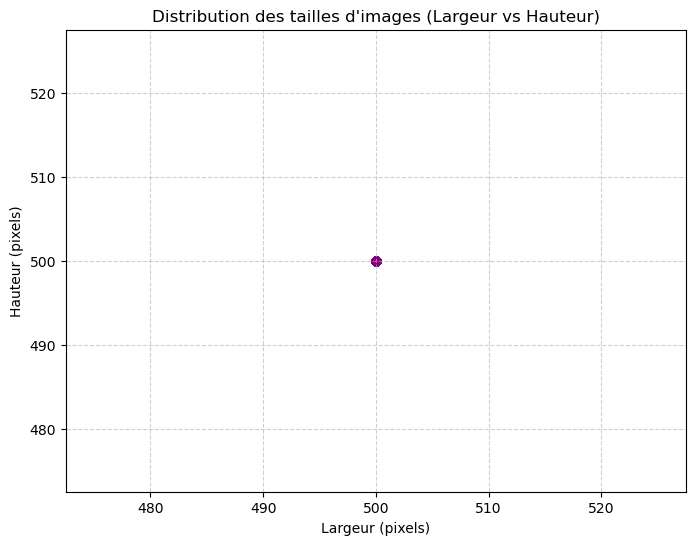


--- Relation Longueur Titre vs Catégorie ---


C:\Users\amisf\AppData\Local\Temp\ipykernel_38936\2340618650.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prdtypecode', y='designation_len', data=df, order=ordre_cat, palette="viridis")


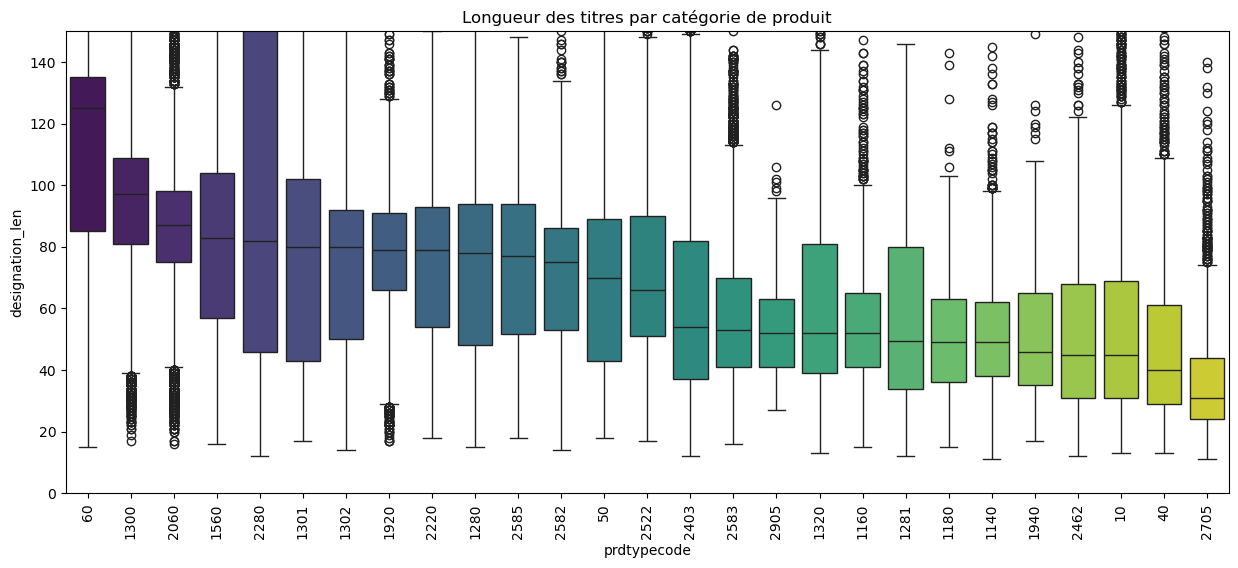

In [12]:

from PIL import Image

#Analyse des dimensions des images (sur un échantillon pour la rapidité)
print("--- Analyse statistique des Images (Echantillon 1000) ---")
echantillon_img = df.sample(1000, random_state=42)
img_sizes = []

for idx, row in echantillon_img.iterrows():
    nom_image = f"image_{row['imageid']}_product_{row['productid']}.jpg"
    chemin = os.path.join(path_img_train, nom_image)
    try:
        with Image.open(chemin) as img:
            img_sizes.append(img.size) # (largeur, hauteur)
    except:
        pass

img_sizes_arr = np.array(img_sizes)
print(f"Dimensions moyennes : {img_sizes_arr.mean(axis=0)}")
print(f"Dimensions min : {img_sizes_arr.min(axis=0)}")
print(f"Dimensions max : {img_sizes_arr.max(axis=0)}")

# Graphique des dimensions
plt.figure(figsize=(8, 6))
plt.scatter(img_sizes_arr[:, 0], img_sizes_arr[:, 1], alpha=0.5, c='purple')
plt.title("Distribution des tailles d'images (Largeur vs Hauteur)")
plt.xlabel("Largeur (pixels)")
plt.ylabel("Hauteur (pixels)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Analyse Bivariée : Relation entre Catégorie et Longueur du Titre
print("\n--- Relation Longueur Titre vs Catégorie ---")
plt.figure(figsize=(15, 6))
# On trie par médiane pour plus de lisibilité
ordre_cat = df.groupby('prdtypecode')['designation_len'].median().sort_values(ascending=False).index

sns.boxplot(x='prdtypecode', y='designation_len', data=df, order=ordre_cat, palette="viridis")
plt.title("Longueur des titres par catégorie de produit")
plt.xticks(rotation=90)
plt.ylim(0, 150) # On zoome sur la majorité des titres pour bien voir
plt.show()

Chargement des données en cours...
Données rechargées : (84916, 7)

--- Analyse Sémantique (Top 20 mots) ---


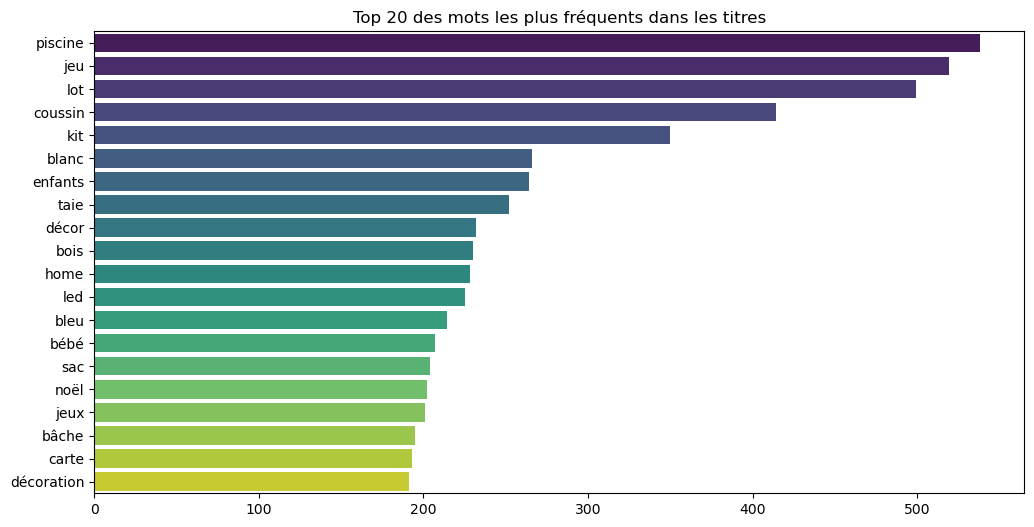


--- Analyse Corrélation : Taille Image vs Longueur Texte ---


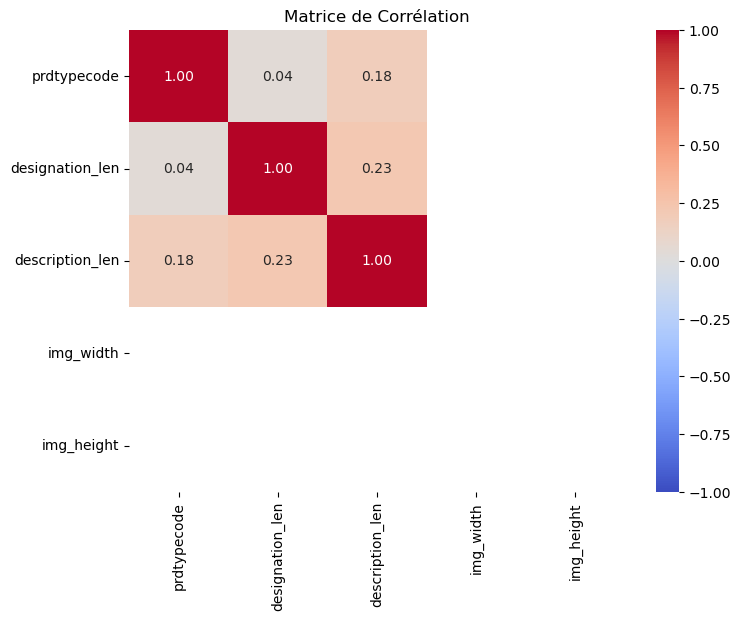

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import re

# 1. RECHARGEMENT DES DONNÉES

path = r"C:\Users\amisf\Desktop\datascientest_projet"
path_img_train = os.path.join(path, "images", "images", "image_training")

print("Chargement des données en cours...")
df_x = pd.read_csv(os.path.join(path, "X_train_update.csv"), index_col=0)
df_y = pd.read_csv(os.path.join(path, "Y_train_CVw08PX.csv"), index_col=0)
df = pd.merge(df_x, df_y, left_index=True, right_index=True)

# Feature Engineering simple
df['designation_len'] = df['designation'].astype(str).apply(len)
df['description_len'] = df['description'].fillna("").astype(str).apply(len)
print(f"Données rechargées : {df.shape}")

# 2. ANALYSE TEXTUELLE (Top 20 mots)

print("\n--- Analyse Sémantique (Top 20 mots) ---")

def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\b\d+\b', '', text) 
    return text

sample_text = df['designation'].sample(10000, random_state=42).apply(clean_text)
all_text = " ".join(sample_text)
words = all_text.split()

stop_words = ['de', 'la', 'le', 'et', 'en', 'des', 'du', 'pour', 'un', 'une', 'avec', 'les', 'à', 'au', 'for', 'a', 'of', 'in', 'the', 'and', 'with', 'to']
filtered_words = [w for w in words if w not in stop_words and len(w) > 2]

word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Préparation des données pour le graphique (Correction Warning)
y_words = [val[0] for val in common_words]
x_counts = [val[1] for val in common_words]

plt.figure(figsize=(12, 6))
# Ajout de hue=y_words et legend=False pour corriger le warning
sns.barplot(x=x_counts, y=y_words, hue=y_words, legend=False, palette='viridis')
plt.title("Top 20 des mots les plus fréquents dans les titres")
plt.show()

# 3. ANALYSE CORRÉLATION (TEXTE vs IMAGE)

print("\n--- Analyse Corrélation : Taille Image vs Longueur Texte ---")
echantillon_corr = df.sample(1000, random_state=42)
img_widths = []
img_heights = []

for idx, row in echantillon_corr.iterrows():
    nom_image = f"image_{row['imageid']}_product_{row['productid']}.jpg"
    chemin = os.path.join(path_img_train, nom_image)
    try:
        with Image.open(chemin) as img:
            img_widths.append(img.width)
            img_heights.append(img.height)
    except:
        img_widths.append(np.nan)
        img_heights.append(np.nan)

echantillon_corr['img_width'] = img_widths
echantillon_corr['img_height'] = img_heights

cols_corr = ['prdtypecode', 'designation_len', 'description_len', 'img_width', 'img_height']
corr_matrix = echantillon_corr[cols_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

In [2]:
import pandas as pd
import os

# Définition du chemin
path = r"C:\Users\amisf\Desktop\datascientest_projet"

# VÉRIFICATION DE LA COHÉRENCE DU JEU DE TEST (X_test)
print("--- Audit du fichier Test (X_test) ---")

try:
    df_test = pd.read_csv(os.path.join(path, "X_test_update.csv"), index_col=0)

    print(f"Dimensions Test : {df_test.shape}")
    print("\nTaux de valeurs manquantes (Test) :")
    print(df_test.isnull().mean() * 100)

    # Vérification rapide de la structure par rapport au Train
    if df_test.isnull().mean()['description'] > 30:
        print("\nCONCLUSION : Le jeu de test est cohérent avec le train (mêmes manques sur la description).")
    else:
        print("\nATTENTION : Structure différente détectée.")

except Exception as e:
    print(f"Erreur lors du chargement : {e}")

--- Audit du fichier Test (X_test) ---
Dimensions Test : (13812, 4)

Taux de valeurs manquantes (Test) :
designation     0.000000
description    35.375036
productid       0.000000
imageid         0.000000
dtype: float64

ATTENTION : Structure différente détectée.
